<a href="https://colab.research.google.com/github/mann09/cds_mini_projects/blob/main/M2_MiniProject_1_LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [ ]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

### Data Loading

In [ ]:
# Read the hour.csv file
# YOUR CODE HERE
bike_data = pd.read_csv("hour.csv")

print the first five rows of dataset

In [ ]:
# YOUR CODE HERE
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [ ]:
# YOUR CODE HERE
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

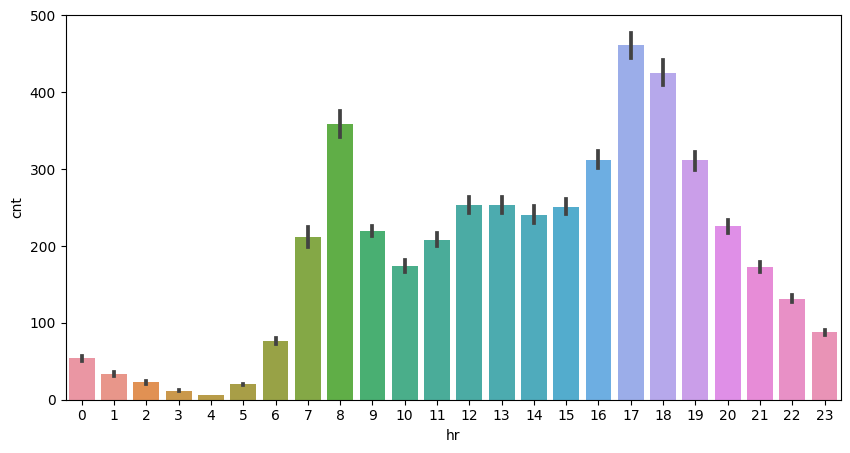

Busy hours of bike sharing in descending order are: [17, 18, 8, 16, 19, 13, 12, 15, 14, 20, 9, 7, 11, 10, 21, 22, 23, 6, 0, 1, 2, 5, 3, 4]


In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(10,5))
sns.barplot(x='hr',y='cnt', data = bike_data)
plt.show()

# Find the busy hours of bike sharing
hourly_counts = bike_data.groupby('hr')['cnt'].mean().reset_index()
busy_hours = hourly_counts.sort_values(by='cnt', ascending=False)['hr'].tolist()

print("Busy hours of bike sharing in descending order are:", busy_hours)

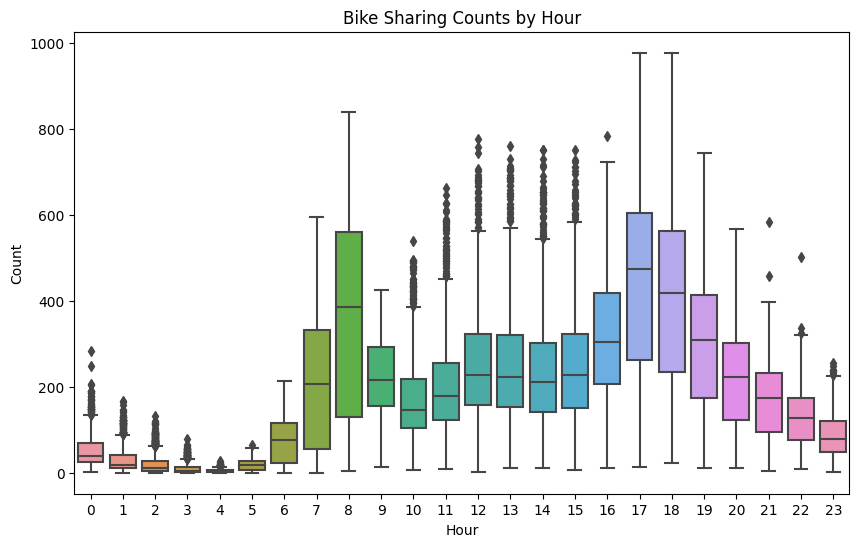

Busy hours of bike sharing in descending order are: [17, 18, 8, 16, 19, 13, 12, 15, 14, 20, 9, 7, 11, 10, 21, 22, 23, 6, 0, 1, 2, 5, 3, 4]


In [ ]:
# Visualize the distribution of bike sharing counts based on the hour
plt.figure(figsize=(10, 6))
sns.boxplot(x='hr', y='cnt', data=bike_data, showfliers=True)
plt.title('Bike Sharing Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

# Find the busy hours of bike sharing
hourly_counts = bike_data.groupby('hr')['cnt'].mean().reset_index()
busy_hours = hourly_counts.sort_values(by='cnt', ascending=False)['hr'].tolist()

print("Busy hours of bike sharing in descending order are:", busy_hours)

#### Visualize the distribution of count, casual and registered variables

<Figure size 1000x500 with 0 Axes>

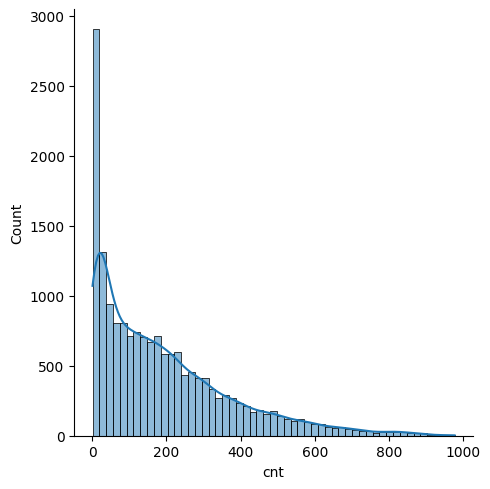

In [ ]:
# YOUR CODE HERE for distribuiton of count variable
plt.figure(figsize=(10,5))
sns.displot(bike_data['cnt'],kde=True)

<Figure size 1000x500 with 0 Axes>

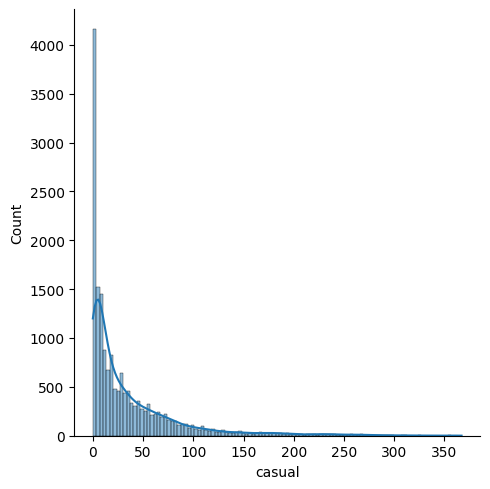

In [ ]:
# YOUR CODE HERE for distribuiton of casual variable
plt.figure(figsize=(10,5))
sns.displot(bike_data['casual'],kde=True)
plt.show()

<Figure size 1000x500 with 0 Axes>

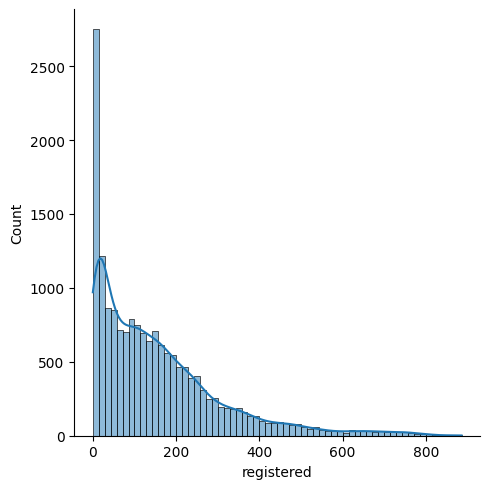

In [ ]:
# YOUR CODE HERE for distribuiton of registered variable
plt.figure(figsize=(10,5))
sns.displot(bike_data['registered'],kde=True)
plt.show()

#### Describe the relation of weekday, holiday and working day

In [ ]:
# YOUR CODE HERE
print("working day: ",bike_data['workingday'].unique())
print("week day: ",bike_data['weekday'].unique())
print("holiday: ",bike_data['holiday'].unique())

print("for weekday 6 is Saturday and 0 is Sunday")

working day:  [0 1]
week day:  [6 0 1 2 3 4 5]
holiday:  [0 1]
for weekday 6 is Saturday and 0 is Sunday


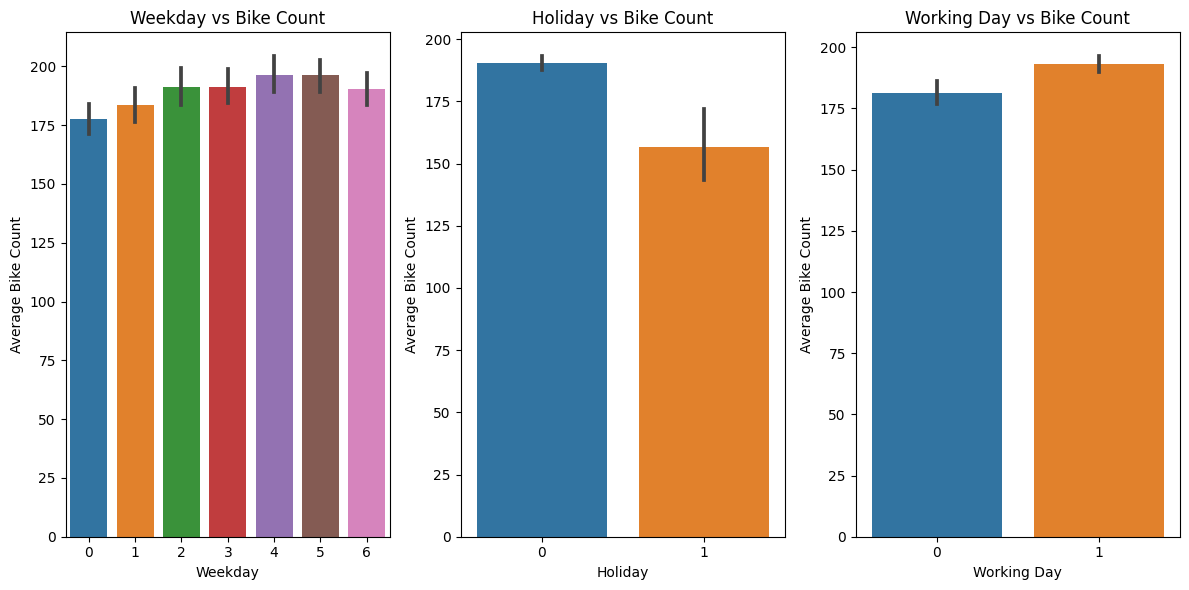

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Create a subplot for Weekday vs Bike Count
plt.subplot(1, 3, 1)
sns.barplot(data=bike_data, x='weekday', y='cnt')
plt.title('Weekday vs Bike Count')
plt.xlabel('Weekday')
plt.ylabel('Average Bike Count')

# Create a subplot for Holiday vs Bike Count
plt.subplot(1, 3, 2)
sns.barplot(data=bike_data, x='holiday', y='cnt')
plt.title('Holiday vs Bike Count')
plt.xlabel('Holiday')
plt.ylabel('Average Bike Count')

# Create a subplot for Working Day vs Bike Count
plt.subplot(1, 3, 3)
sns.barplot(data=bike_data, x='workingday', y='cnt')
plt.title('Working Day vs Bike Count')
plt.xlabel('Working Day')
plt.ylabel('Average Bike Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

<Figure size 1000x500 with 0 Axes>

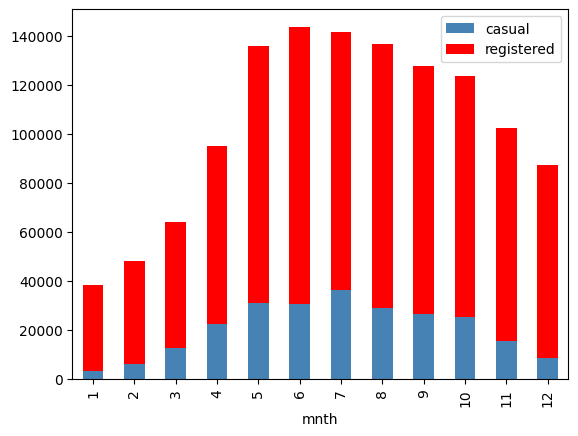

In [ ]:
# stacked bar chart for year 2011
# YOUR CODE HERE
bike_data_2011 = bike_data[bike_data.yr==0][['mnth','casual','registered']]
plt.figure(figsize=(10,5))
#create stacked bar chart
bike_data_2011.groupby('mnth').sum().plot(kind='bar', stacked=True, color=['steelblue', 'red'])
plt.show()

<Figure size 1000x500 with 0 Axes>

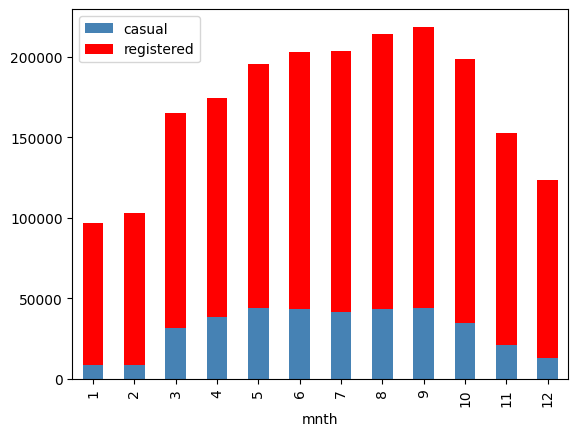

In [ ]:
# stacked bar chart for year 2012
# YOUR CODE HERE
bike_data_2012 = bike_data[bike_data.yr==1][['mnth','casual','registered']]
plt.figure(figsize=(10,5))
#create stacked bar chart
bike_data_2012.groupby('mnth').sum().plot(kind='bar', stacked=True, color=['steelblue', 'red'])
plt.show()

#### Analyze the correlation between features with heatmap

<ipython-input-15-a31496f10900>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bike_data.corr()


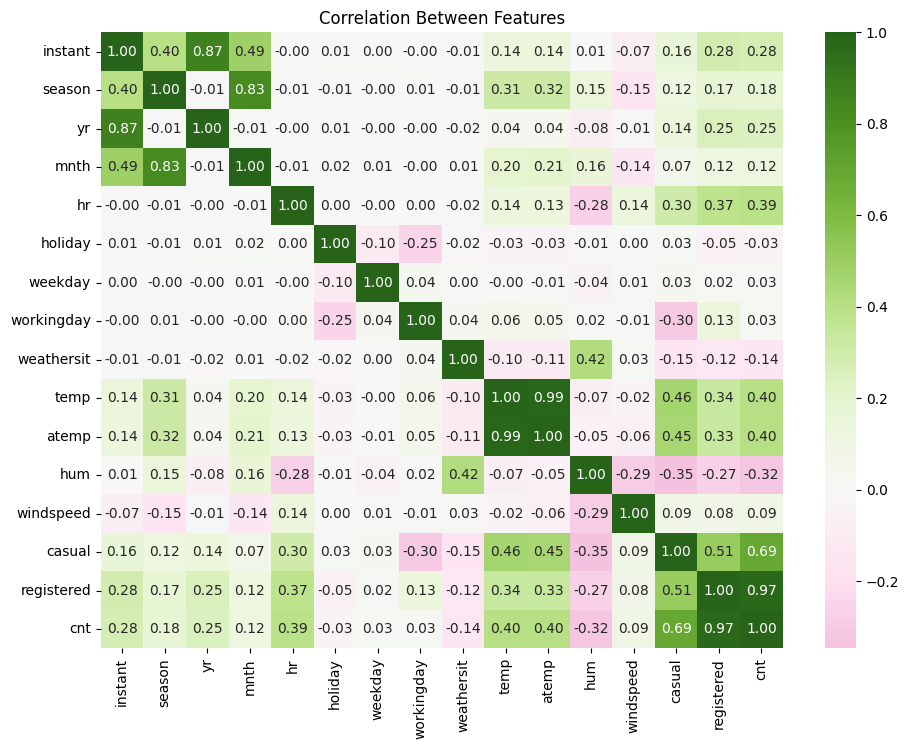

In [ ]:
# Calculate the correlation matrix
correlation_matrix = bike_data.corr()

# Set up the figure and axes
plt.figure(figsize=(11, 8))

# Create a heatmap
sns.heatmap(data=correlation_matrix, center=0, annot=True, cmap='PiYG', fmt=".2f")

# Set plot title
plt.title('Correlation Between Features')

# Show the plot
plt.show()

#### Visualize the box plot of casual and registered variables to check the outliers

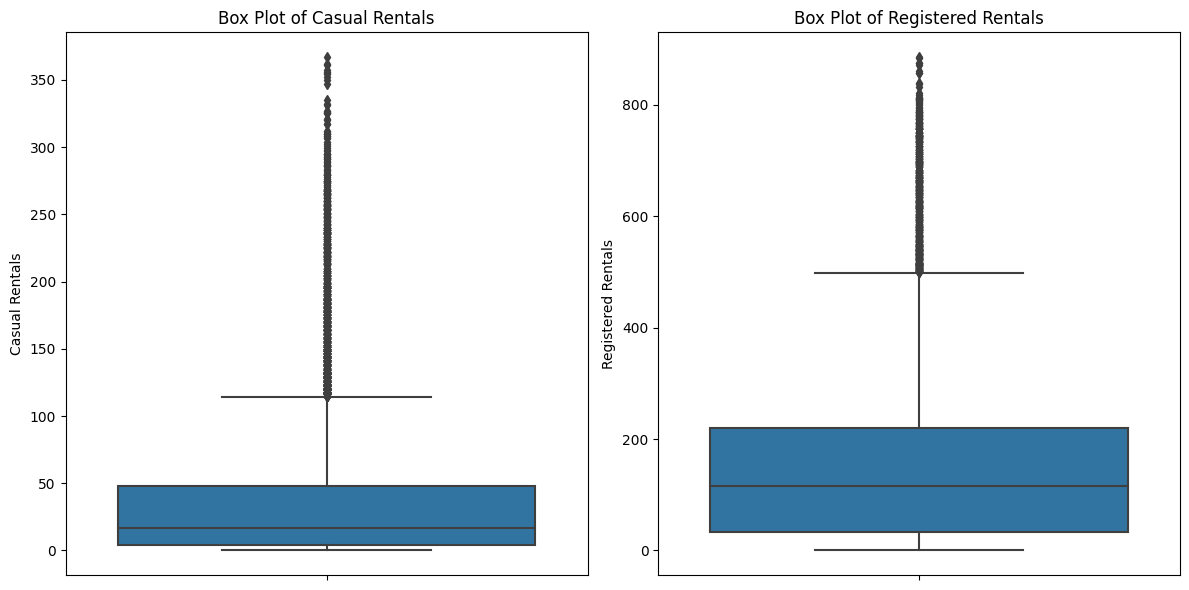

In [ ]:
# Set up the figure and axes with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create a box plot for 'casual' variable
sns.boxplot(data=bike_data, y='casual', ax=axes[0])
axes[0].set_title('Box Plot of Casual Rentals')
axes[0].set_ylabel('Casual Rentals')

# Create a box plot for 'registered' variable
sns.boxplot(data=bike_data, y='registered', ax=axes[1])
axes[1].set_title('Box Plot of Registered Rentals')
axes[1].set_ylabel('Registered Rentals')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [ ]:
# YOUR CODE HERE
# we drop the instant and dteday columns as they are redundant
bike_data_new = bike_data.drop(['instant','dteday'],axis=1)
bike_data_new.shape

(17379, 15)

#### Identify categorical and continuous variables


In [ ]:
# YOUR CODE HERE
# In this data , (most)categorical columns have datatype as int and numerical columns have datatype as float
cat_cols=[]
num_cols=[]
for col in bike_data_new.columns:
  if col not in ['casual', 'registered', 'cnt'] and bike_data_new[col].dtype=="int64":
    cat_cols.append(col)
  else:
    num_cols.append(col)

print("Categorical Columns: ",cat_cols)
print("Numerical Columns: ",num_cols)

Categorical Columns:  ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
Numerical Columns:  ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [ ]:
# YOUR CODE HERE
scaler = StandardScaler()
bike_data_num_transformed = scaler.fit_transform(bike_data_new[['temp', 'atemp', 'hum', 'windspeed']])
bike_data_num_transformed_df = pd.DataFrame(bike_data_num_transformed, columns = ['temp', 'atemp', 'hum', 'windspeed'])
bike_data_num_transformed_df

,temp,atemp,hum,windspeed
0,-1.334648,-1.093281,0.947372,-1.553889
1,-1.438516,-1.181732,0.895539,-1.553889
2,-1.438516,-1.181732,0.895539,-1.553889
3,-1.334648,-1.093281,0.636370,-1.553889
4,-1.334648,-1.093281,0.636370,-1.553889
...,...,...,...,...
17374,-1.230779,-1.269602,-0.141137,-0.211691
17375,-1.230779,-1.269602,-0.141137,-0.211691
17376,-1.230779,-1.269602,-0.141137,-0.211691
17377,-1.230779,-1.181732,-0.348473,-0.456099


#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [ ]:
# YOUR CODE HERE
#bike_data_new[cat_cols]
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
bike_data_one_hot_enc = enc.fit_transform(bike_data_new[cat_cols])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Specify features and targets after applying scaling and one-hot encoding

In [ ]:
# YOUR CODE HERE
bike_data_one_hot_enc_df = pd.DataFrame(bike_data_one_hot_enc,columns=enc.get_feature_names_out())
bike_data_one_hot_enc_df.head()

,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
bike_data.shape

(17379, 17)

In [ ]:
# create a combined dataset from transformed data and one hot encoded data
bike_data_final = pd.concat([bike_data_one_hot_enc_df ,bike_data_num_transformed_df, bike_data[['casual', 'registered', 'cnt']]], axis=1)
bike_data_final.shape

(17379, 64)

### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [ ]:
# YOUR CODE HERE
X = bike_data_final.iloc[:,:61]
y = bike_data_final['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Train shape: ",X_train.shape)
print(" Test shape: ",X_test.shape)

 Train shape:  (13903, 61)
 Test shape:  (3476, 61)


#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [ ]:
# YOUR CODE HERE
# Linear Regression using Lstsq
from scipy.linalg import lstsq
x , _, _, _ = np.linalg.lstsq(X_train,y_train)
x

<ipython-input-26-108ff2d471d0>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x , _, _, _ = np.linalg.lstsq(X_train,y_train)


array([ 8.80040156e+14,  8.80040156e+14,  8.80040156e+14,  8.80040156e+14,
       -2.38465465e+15, -2.38465465e+15,  9.14137855e+14,  9.14137855e+14,
        9.14137855e+14,  9.14137855e+14,  9.14137855e+14,  9.14137855e+14,
        9.14137855e+14,  9.14137855e+14,  9.14137855e+14,  9.14137855e+14,
        9.14137855e+14,  9.14137855e+14,  6.08802305e+13,  6.08802305e+13,
        6.08802305e+13,  6.08802305e+13,  6.08802305e+13,  6.08802305e+13,
        6.08802305e+13,  6.08802305e+13,  6.08802305e+13,  6.08802305e+13,
        6.08802305e+13,  6.08802305e+13,  6.08802305e+13,  6.08802305e+13,
        6.08802305e+13,  6.08802305e+13,  6.08802305e+13,  6.08802305e+13,
        6.08802305e+13,  6.08802305e+13,  6.08802305e+13,  6.08802305e+13,
        6.08802305e+13,  6.08802305e+13,  5.44751647e+14, -3.42987826e+14,
       -6.19352201e+13,  8.25804253e+14,  8.25804253e+14,  8.25804253e+14,
        8.25804253e+14,  8.25804253e+14, -6.19352201e+13, -1.58683164e+14,
       -1.04642264e+15,  

#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a)

In [ ]:
# YOUR CODE HERE
# Add a column of ones to the design matrix for the intercept term
X_train_augmented = np.column_stack((np.ones(len(X_train)), X_train))

# Initialize the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Initialize coefficients (including intercept) with zeros or random values
coefficients = np.zeros(X_train_augmented.shape[1])

# Batch Gradient Descent
for _ in range(num_iterations):
    # Calculate predictions
    predictions = np.dot(X_train_augmented, coefficients)

    # Calculate errors
    errors = predictions - y_train

    # Calculate gradients
    gradients = np.dot(X_train_augmented.T, errors) / len(y_train)

    # Update coefficients
    coefficients -= learning_rate * gradients

# The coefficients vector contains the learned coefficients
intercept = coefficients[0]
coeffs = coefficients[1:]
# Print the results
print("Intercept:", intercept)
print("Coefficients:", coeffs)

Intercept: 49.87848526350827
Coefficients: [ -3.29999203  12.79323962  -7.41954831  47.80478598 -14.38489257
  64.26337783   3.95134616  -1.24003782   2.15807958   1.84652371
  10.94963483  -9.03739762 -18.78961287  -1.33407255  23.55883573
  19.93336142   7.02350733  10.85831737 -35.4313302  -40.54071191
 -43.75392019 -42.82244748 -44.83001703 -39.03965438 -19.84410264
  24.66684981  73.22834936  17.6543247   -4.0587719    0.49395351
  12.57248369   9.14193689   0.27533559   2.86686624  26.26368671
  81.3984228   68.01477078  35.59849063  11.62583022  -3.07226964
 -14.19195129 -26.33763901  44.34567317   5.53281209   3.54387723
   6.50638244   5.16061166   7.15404455   4.87371573   8.98994932
  13.64990434  22.72659366  27.1518916   20.08392598  26.9751821
   2.70190907   0.11746811  36.38374778  35.55001259 -45.20250126
   3.36281071]


#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()
sgdr.fit(X_train, y_train)
y_pred = sgdr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

MSE:  10069.364888168648
RMSE:  100.34622508180688


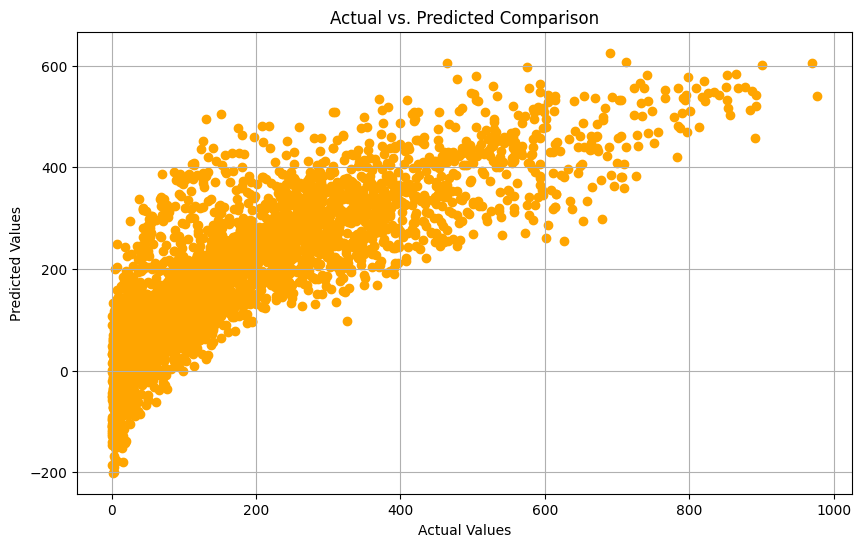

In [ ]:
# Create a scatter plot for y_test vs. y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='orange')
plt.title('Actual vs. Predicted Comparison')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

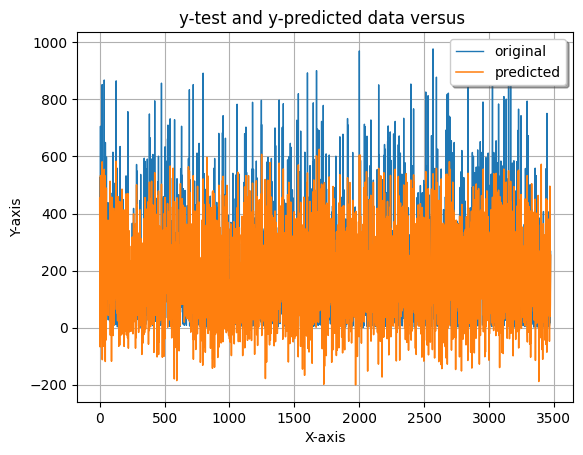

In [ ]:
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data versus ")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

MSE:  10086.983282688436
RMSE:  100.43397474305414


#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [ ]:
# YOUR CODE HERE
feature_names = X_train.columns.tolist()
n_obs = len(y_train)
n_predictors = len(feature_names)
r_squared=lr.score(X_test, y_test)

print("R2: ",r_squared)

adj_r_squared = 1 - ((1 - r_squared) * (n_obs - 1)) / (n_obs - n_predictors - 1)
print("Adj. R-squared:", adj_r_squared)

R2:  0.6814510578905639
Adj. R-squared: 0.6800471502633205


#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

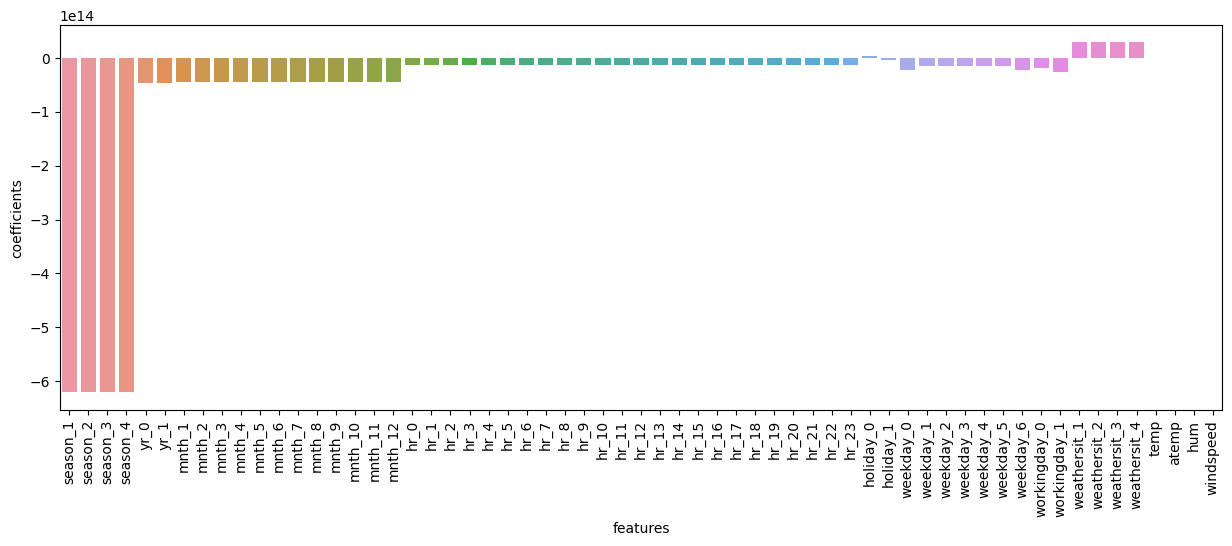

In [ ]:
# YOUR CODE HERE
# get coefficients
cdf = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
cdf.columns = ['features','coefficients']

# create bar chart
plt.figure(figsize=(15,5))
sns.barplot(x='features', y='coefficients', data=cdf)
plt.xticks(rotation=90)
plt.show()

### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

#alpha = np.arange(0.01, 0.99, 0.01)   #We tried these values and found best value of alpha as 0.06999999999999999

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Lasso
mse_list=[]
for a in alpha:
  ls = Lasso(alpha=a)
  ls.fit(X_train, y_train)
  y_pred = ls.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  mse_list.append(mse)
  print("alpha:", a)
  print("MSE: ", mse)
  print("RMSE: ", mse**(1/2.0))
  print("--"*30)

print("Best Aplha which gives least error is: ", alpha[np.argmin(mse_list)])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.667e+06, tolerance: 4.616e+04
  model = cd_fast.enet_coordinate_descent(


alpha: 0.0001
MSE:  10089.274986786937
RMSE:  100.44538310339075
------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.579e+05, tolerance: 4.616e+04
  model = cd_fast.enet_coordinate_descent(


alpha: 0.001
MSE:  10088.311056173301
RMSE:  100.44058470644872
------------------------------------------------------------
alpha: 0.01
MSE:  10080.989845009917
RMSE:  100.40413260922041
------------------------------------------------------------
alpha: 0.1
MSE:  10074.876428946309
RMSE:  100.37368394627303
------------------------------------------------------------
alpha: 1
MSE:  10726.174672936608
RMSE:  103.56724710513748
------------------------------------------------------------
alpha: 10
MSE:  22662.12298510286
RMSE:  150.53943996542188
------------------------------------------------------------
alpha: 100
MSE:  31696.431667389956
RMSE:  178.03491698930847
------------------------------------------------------------
Best Aplha which gives least error is:  0.1


#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Ridge
mse_list=[]
for a in alpha:
  ls = Ridge(alpha=a)
  ls.fit(X_train, y_train)
  y_pred = ls.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  mse_list.append(mse)
  print("alpha:", a)
  print("MSE: ", mse)
  print("RMSE: ", mse**(1/2.0))
  print("--"*30)

print("Best Aplha which gives least error is: ", alpha[np.argmin(mse_list)])

alpha: 0.0001
MSE:  10089.387548361636
RMSE:  100.44594341416499
------------------------------------------------------------
alpha: 0.001
MSE:  10089.382449096294
RMSE:  100.44591803102948
------------------------------------------------------------
alpha: 0.01
MSE:  10089.331645133085
RMSE:  100.44566513858666
------------------------------------------------------------
alpha: 0.1
MSE:  10088.8416741148
RMSE:  100.44322612359083
------------------------------------------------------------
alpha: 1
MSE:  10085.195492342467
RMSE:  100.42507402209105
------------------------------------------------------------
alpha: 10
MSE:  10074.76853117944
RMSE:  100.37314646447744
------------------------------------------------------------
alpha: 100
MSE:  10341.90612565831
RMSE:  101.69516274463751
------------------------------------------------------------
Best Aplha which gives least error is:  10


In [ ]:
#alpha = np.arange(1, 20, 1)  # We tried these options also for Alpha and found best value at 12

#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import ElasticNet
mse_list=[]
for a in alpha:
  ls = ElasticNet(alpha=a)
  ls.fit(X_train, y_train)
  y_pred = ls.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  mse_list.append(mse)
  print("alpha:", a)
  print("MSE: ", mse)
  print("RMSE: ", mse**(1/2.0))
  print("--"*30)

print("Best Aplha which gives least error is: ", alpha[np.argmin(mse_list)])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.980e+07, tolerance: 4.616e+04
  model = cd_fast.enet_coordinate_descent(


alpha: 0.0001
MSE:  10085.997529306873
RMSE:  100.42906715342363
------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.062e+05, tolerance: 4.616e+04
  model = cd_fast.enet_coordinate_descent(


alpha: 0.001
MSE:  10076.157142860053
RMSE:  100.3800634730824
------------------------------------------------------------
alpha: 0.01
MSE:  10207.004169356267
RMSE:  101.0297192382334
------------------------------------------------------------
alpha: 0.1
MSE:  13793.671031862961
RMSE:  117.44646027813252
------------------------------------------------------------
alpha: 1
MSE:  21083.54617503305
RMSE:  145.20174301651153
------------------------------------------------------------
alpha: 10
MSE:  27962.862338467865
RMSE:  167.22099849740124
------------------------------------------------------------
alpha: 100
MSE:  31547.978907503624
RMSE:  177.61750732262746
------------------------------------------------------------
Best Aplha which gives least error is:  0.001


In [ ]:
 #alpha = np.arange(0.001, 0.002, 0.0001)   #we tried these as well and found least error at alpha 0.0018

### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

In [ ]:
# Use Casual as Target
X = bike_data_final.iloc[:,:61]
y = bike_data_final['casual'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Train shape: ",X_train.shape)
print(" Test shape: ",X_test.shape)

 Train shape:  (13903, 61)
 Test shape:  (3476, 61)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

MSE:  953.580469199511
RMSE:  30.880098270561106


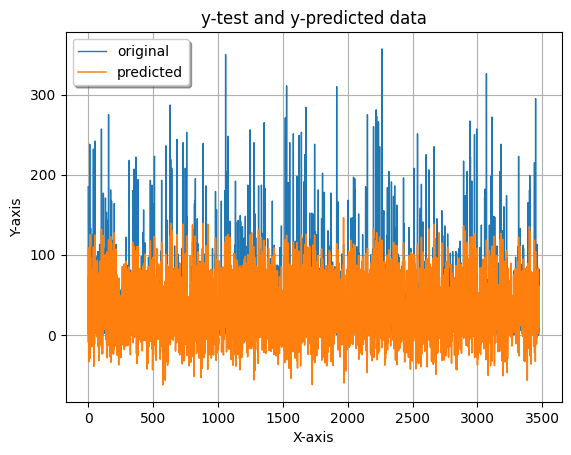

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
# Use Registered as Target
X = bike_data_final.iloc[:,:61]
y = bike_data_final['registered'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Train shape: ",X_train.shape)
print(" Test shape: ",X_test.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

 Train shape:  (13903, 61)
 Test shape:  (3476, 61)
MSE:  7153.081163693901
RMSE:  84.57588996690428


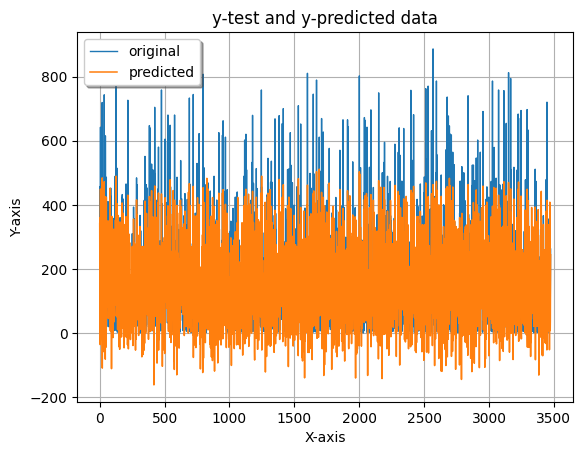

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?


**Linear Regression Equation:**

y = 49.88 + -3.3 * season_1 + 12.8 * season_2 + -7.4 * season_3 + 47.8 * season_4 +

-14.4 * yr_0 + 64.3 * yr_1` +

3.95 * mnth_1 + -1.24 * mnth_2 + 2.15 * mnth_3 + 1.84 * mnth_4 + 10.94 * mnth_5 + -9.03 * mnth_6 +
-18.78 * mnth_7 + -1.33 * mnth_8 +
23.55 * mnth_9  + 19.93 * mnth_10 + 7.02 * mnth_11 + 10.85 * mnth_12 +  

 -35.43 * hr_0 + -40.54 * hr_1 + -43.75 * hr_2 +  -42.82 * hr_3 + -44.83 * hr_4 + -39.03 * hr_5 +  -19.84 * hr_6 + 24.66 * hr_7 + 73.23 * hr_8 +
  17.65 * hr_9 + -4.05 * hr_10 + 0.49 * hr_11 +  12.57 * hr_12 + 9.14* hr_13 + 0.27 * hr_14 +  2.86 * hr_15 + 26.26* hr_16 + 81.39 * hr_17 +
 68.01 * hr_18 + 35.59 * hr_19 + 11.62 * hr_20 + -3.072 * hr_21 + -14.19 * hr_22 + -26.33 * hr_23 +

 44.34 * holiday_0 + 5.53 * holiday_1 + 3.54 * weekday_0 + 6.50 * weekday_1 + 5.16 * weekday_2 + 7.15 * weekday_3 + 4.87 * weekday_4 + 8.98 * weekday_5 + 13.64 * weekday_6 +

22.72 * workingday_0 + 27.15 * workingday_1 +

20.08 * weathersit_1 + 26.97 * weathersit_2 + 2.70 * weathersit_3 + 0.11 * weathersit_4 +

36.38 * temp + 35.55 * atemp + -45.20 * hum + 3.36 * windspeed

**MSE based best model is Lasso**:

1. SGD Regressor	: 10086.466
2. Linear Regression: 10086.983
3. **Lasso Regression**	: **10072.326** ----- Alpha = 0.069 or 0.1
4. Ridge regression	: 10074.435 ----- Alpha = 12 or 10
5. ElNet regression	: 10074.323 ----- Alpha = 0.0018 or 0.002